# **TAKE HOME EXERCISE**
1. Dataset yang digunakan adalah Admission_Predict.csv. X = 'GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', Y = Chance of Admit

2. Buat beberapa percobaan untuk menemukan model MLR terbaik

3. Urutan percobaan 1 (train 80% test 20%):

    1.a) Variabel independent tidak ada intervensi sama sekali + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
    1.b) Handling outlier + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
    1.c) Handling outlier + Scalling + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
4. Urutan percobaan 2 (train 90% test 10%):

    2.a) Variabel independent tidak ada intervensi sama sekali + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
    2.b) Handle outlier + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
    2.c) Handling outlier + Scalling   + pilihan model (MLR, LASSO, Ridge, ElasticNet, Polynomial)
    
5. Di setiap percobaan tampilkan MAE, MSE, dan RMSE + Perkembangan secara persentase

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Overview

To start, first we have to see the overview of the data and check for any missing values.

In [2]:
df_adm = pd.read_csv('Admission_Predict.csv').drop(['Serial No.'], axis = 1)

In [3]:
df_adm.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df_adm.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'}, inplace=True)

In [5]:
df_adm.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df_adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [7]:
df_adm.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df_adm.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Preparation

In [9]:
def tsplit(x,y,n):
    return train_test_split(x, y, train_size=float(n), random_state=0)

def mae(test,pred):
    return metrics.mean_absolute_error(test,pred)

def mse(test,pred):
    return metrics.mean_squared_error(test,pred)

def rmse(test,pred):
    return np.sqrt(metrics.mean_squared_error(test,pred))

def r2(test,pred):
    return (round(metrics.r2_score(test,pred), 2))

def mae_pct(ma,tgt):
    return round(ma / tgt.mean() * 100, 2)

def rms_pct(rms,tgt):
    return round(rms / tgt.mean() * 100, 2)

def linear(xt,yt):
    return LinearRegression().fit(xt,yt)

def ridge(xt,yt):
    return Ridge().fit(xt,yt)

def lasso(xt,yt):
    return Lasso().fit(xt,yt)

def elastic(xt,yt):
    return ElasticNet().fit(xt,yt)

def poly(xt,yt,n):
    return make_pipeline(PolynomialFeatures(int(n), include_bias=False), 
                         LinearRegression()).fit(xt,yt)

In [10]:
def EVAL(xtrain,xtest,ytrain,ytest,tgt):
    
    method=[['LIN', LinearRegression()],
           ['RID', Ridge()],
           ['LAS', Lasso()],
           ['ELA', ElasticNet()],
           ['POL', make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())]]
    
    name = []
    reg1 = []
    reg2 = []
    reg3 = []
    rscr = []
    mae_pct = []
    rms_pct = []
    
    for names, models in method:
        model = models
        model.fit(xtrain,ytrain)
        y_pred = model.predict(xtest)
        mae = metrics.mean_absolute_error(ytest,y_pred)
        mse = metrics.mean_squared_error(ytest,y_pred)
        rms = np.sqrt(metrics.mean_squared_error(ytest, y_pred))
        r2s = round(metrics.r2_score(ytest,y_pred), 2)
        pmae = round(mae / tgt.mean() * 100, 2)
        prms = round(rms / tgt.mean() * 100, 2)
        
        name.append(names)
        reg1.append(mae)
        reg2.append(mse)
        reg3.append(rms)
        rscr.append(r2s)
        mae_pct.append(pmae)
        rms_pct.append(prms)
        
        df = pd.DataFrame({'Model' : name, 'MAE' : reg1, 'MAE %' : mae_pct, 
                           'MSE' : reg2, 'RMSE' : reg3, 'RMSE %' : rms_pct, 
                           'R2 Score' : rscr})        
    return df

After making sure that everything are settled, we can start the process starting with the 80% Train data.

## DATA TRAIN 80%

### a) No Intervention

#### Spliting 

In [11]:
#Split Dep(y) & Indep(x)
x = df_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
y = df_adm['Chance of Admit'].values

#Split Train & Test 
x_train, x_test, y_train, y_test = tsplit(x,y,0.8)

#### Model Fitting Linear, Ridge, LASSO, Elastic, Polynomial

In [13]:
LIN = linear(x_train,y_train)
RID = ridge(x_train,y_train)
LAS = lasso(x_train,y_train)
ELA = elastic(x_train,y_train)
POL = poly(x_train,y_train,2)

#### Predict

In [14]:
yp_LIN = LIN.predict(x_test)
yp_RID = RID.predict(x_test)
yp_LAS = LAS.predict(x_test)
yp_ELA = ELA.predict(x_test)
yp_POL = POL.predict(x_test)

#### Evaluating Model

In [15]:
#Linear
LIN_MAE = mae(y_test, yp_LIN)
LIN_MSE = mse(y_test, yp_LIN)
LIN_RMSE= rmse(y_test, yp_LIN)
LIN_R2  = r2(y_test, yp_LIN)
LIN_mpc = mae_pct(LIN_MAE,df_adm['Chance of Admit'])
LIN_rms = rms_pct(LIN_RMSE,df_adm['Chance of Admit'])

#Ridge
RID_MAE = mae(y_test, yp_RID)
RID_MSE = mse(y_test, yp_RID)
RID_RMSE= rmse(y_test, yp_RID)
RID_R2  = r2(y_test, yp_RID)
RID_mpc = mae_pct(RID_MAE,df_adm['Chance of Admit'])
RID_rms = rms_pct(RID_RMSE,df_adm['Chance of Admit'])

#LASSO
LAS_MAE = mae(y_test, yp_LAS)
LAS_MSE = mse(y_test, yp_LAS)
LAS_RMSE= rmse(y_test, yp_LAS)
LAS_R2  = r2(y_test, yp_LAS)
LAS_mpc = mae_pct(LAS_MAE,df_adm['Chance of Admit'])
LAS_rms = rms_pct(LAS_RMSE,df_adm['Chance of Admit'])

#Elastic
ELA_MAE = mae(y_test, yp_ELA)
ELA_MSE = mse(y_test, yp_ELA)
ELA_RMSE= rmse(y_test, yp_ELA)
ELA_R2  = r2(y_test, yp_ELA)
ELA_mpc = mae_pct(ELA_MAE,df_adm['Chance of Admit'])
ELA_rms = rms_pct(ELA_RMSE,df_adm['Chance of Admit'])

#Poly
POL_MAE = mae(y_test, yp_POL)
POL_MSE = mse(y_test, yp_POL)
POL_RMSE= rmse(y_test, yp_POL)
POL_R2  = r2(y_test, yp_POL)
POL_mpc = mae_pct(POL_MAE,df_adm['Chance of Admit'])
POL_rms = rms_pct(POL_RMSE,df_adm['Chance of Admit'])

In [16]:
eval_80 = pd.DataFrame({'Method' : ['LINEAR', 'RIDGE', 'LASSO', 'ELASTIC', 'POLY'], 
                        'MAE' : [LIN_MAE, RID_MAE, LAS_MAE, ELA_MAE, POL_MAE], 
                        'MAE %': [LIN_mpc, RID_mpc, LAS_mpc, ELA_mpc, POL_mpc],
                        'MSE' : [LIN_MSE, RID_MSE, LAS_MSE, ELA_MSE, POL_MSE],
                        'RMSE': [LIN_RMSE, RID_RMSE, LAS_RMSE, ELA_RMSE, POL_RMSE],
                        'RMSE %': [LIN_rms, RID_rms, LAS_rms, ELA_rms, POL_rms],
                        'R2 Score'  : [LIN_R2, RID_R2, LAS_R2, ELA_R2, POL_R2]})

In [17]:
eval_80

,Method,MAE,MAE %,MSE,RMSE,RMSE %,R2 Score
0,LINEAR,0.050088,6.91,0.004805,0.069319,9.57,0.74
1,RIDGE,0.049890,6.89,0.004787,0.069186,9.55,0.74
2,LASSO,0.088901,12.27,0.013260,0.115153,15.90,0.27
3,ELASTIC,0.071704,9.90,0.009163,0.095724,13.22,0.50
4,POLY,0.051533,7.11,0.005289,0.072724,10.04,0.71


### b) No Outliers

#### Eliminate Outliers

In [18]:
df1_adm = df_adm.copy()

In [19]:
Q1 = df1_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']].quantile(0.25)
Q3 = df1_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR 

In [20]:
df1_adm_outdrop = df1_adm[~((df1_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']] < lower) | (df1_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']] > upper))].dropna()

In [21]:
df1_adm_outdrop.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Splitting

In [22]:
#Split Dep(y) & Indep(x)
x1 = df1_adm_outdrop[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
y1 = df1_adm_outdrop['Chance of Admit'].values

#Split Train & Test
x1_train, x1_test, y1_train, y1_test = tsplit(x1,y1,0.8)

#### Model Fitting Linear, Ridge, LASSO, Elastic, Polynomial

In [23]:
LIN1 = linear(x1_train,y1_train)
RID1 = ridge(x1_train,y1_train)
LAS1 = lasso(x1_train,y1_train)
ELA1 = elastic(x1_train,y1_train)
POL1 = poly(x1_train,y1_train,2)

#### Predict

In [24]:
yp_LIN1 = LIN1.predict(x1_test)
yp_RID1 = RID1.predict(x1_test)
yp_LAS1 = LAS1.predict(x1_test)
yp_ELA1 = ELA1.predict(x1_test)
yp_POL1 = POL1.predict(x1_test)

#### Evaluating Model

In [25]:
#Linear
LIN_MAE1 = mae(y1_test, yp_LIN1)
LIN_MSE1 = mse(y1_test, yp_LIN1)
LIN_RMSE1= rmse(y1_test, yp_LIN1)
LIN_R2_1 = r2(y1_test, yp_LIN1)
LIN_mpc1 = mae_pct(LIN_MAE1,df1_adm_outdrop['Chance of Admit'])
LIN_rms1 = rms_pct(LIN_RMSE1,df1_adm_outdrop['Chance of Admit'])

#Ridge
RID_MAE1 = mae(y1_test, yp_RID1)
RID_MSE1 = mse(y1_test, yp_RID1)
RID_RMSE1= rmse(y1_test, yp_RID1)
RID_R2_1 = r2(y1_test, yp_RID1)
RID_mpc1 = mae_pct(RID_MAE1,df1_adm_outdrop['Chance of Admit'])
RID_rms1 = rms_pct(RID_RMSE1,df1_adm_outdrop['Chance of Admit'])

#LASSO
LAS_MAE1 = mae(y1_test, yp_LAS1)
LAS_MSE1 = mse(y1_test, yp_LAS1)
LAS_RMSE1= rmse(y1_test, yp_LAS1)
LAS_R2_1 = r2(y1_test, yp_LAS1)
LAS_mpc1 = mae_pct(LAS_MAE1,df1_adm_outdrop['Chance of Admit'])
LAS_rms1 = rms_pct(LAS_RMSE1,df1_adm_outdrop['Chance of Admit'])

#Elastic
ELA_MAE1 = mae(y1_test, yp_ELA1)
ELA_MSE1 = mse(y1_test, yp_ELA1)
ELA_RMSE1= rmse(y1_test, yp_ELA1)
ELA_R2_1 = r2(y1_test, yp_ELA1)
ELA_mpc1 = mae_pct(ELA_MAE1,df1_adm_outdrop['Chance of Admit'])
ELA_rms1 = rms_pct(ELA_RMSE1,df1_adm_outdrop['Chance of Admit'])

#Poly
POL_MAE1 = mae(y1_test, yp_POL1)
POL_MSE1 = mse(y1_test, yp_POL1)
POL_RMSE1= rmse(y1_test, yp_POL1)
POL_R2_1 = r2(y1_test, yp_POL1)
POL_mpc1 = mae_pct(POL_MAE1,df1_adm_outdrop['Chance of Admit'])
POL_rms1 = rms_pct(POL_RMSE1,df1_adm_outdrop['Chance of Admit'])

In [26]:
eval_80_NOUT = pd.DataFrame({'Method' : ['LINEAR', 'RIDGE', 'LASSO', 'ELASTIC', 'POLY'], 
                             'MAE' : [LIN_MAE1, RID_MAE1, LAS_MAE1, ELA_MAE1, POL_MAE1],
                             'MAE %': [LIN_mpc1, RID_mpc1, LAS_mpc1, ELA_mpc1, POL_mpc1],
                             'MSE' : [LIN_MSE1, RID_MSE1, LAS_MSE1, ELA_MSE1, POL_MSE1],
                             'RMSE': [LIN_RMSE1, RID_RMSE1, LAS_RMSE1, ELA_RMSE1, POL_RMSE1],
                             'RMSE %': [LIN_rms1, RID_rms1, LAS_rms1, ELA_rms1, POL_rms1],
                             'R2 Score'  : [LIN_R2_1, RID_R2_1, LAS_R2_1, ELA_R2_1, POL_R2_1]})

In [27]:
eval_80_NOUT

,Method,MAE,MAE %,MSE,RMSE,RMSE %,R2 Score
0,LINEAR,0.051760,7.13,0.004625,0.068004,9.37,0.73
1,RIDGE,0.051676,7.12,0.004654,0.068220,9.40,0.72
2,LASSO,0.086764,11.95,0.012609,0.112288,15.47,0.25
3,ELASTIC,0.072678,10.01,0.009079,0.095285,13.12,0.46
4,POLY,0.049540,6.82,0.004536,0.067349,9.28,0.73


### c) No Outliers & Scaling

In [28]:
df2_adm = df1_adm_outdrop.copy()

In [29]:
df2_adm['GRE Scld'] = MinMaxScaler().fit_transform(df2_adm[['GRE Score']])
df2_adm['TOEFL Scld'] = MinMaxScaler().fit_transform(df2_adm[['TOEFL Score']])
df2_adm['University Rating Scld'] = MinMaxScaler().fit_transform(df2_adm[['University Rating']])
df2_adm['SOP Scld'] = MinMaxScaler().fit_transform(df2_adm[['SOP']])
df2_adm['LOR Scld'] = MinMaxScaler().fit_transform(df2_adm[['LOR']])
df2_adm['CGPA Scld'] = MinMaxScaler().fit_transform(df2_adm[['CGPA']])
df2_adm['Research Scld'] = MinMaxScaler().fit_transform(df2_adm[['Research']])

In [30]:
df2_adm.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE Scld,TOEFL Scld,University Rating Scld,SOP Scld,LOR Scld,CGPA Scld,Research Scld
0,337,118,4,4.5,4.5,9.65,1,0.92,0.94,0.928571,0.75,0.875,0.857143,0.900735,1.0
1,324,107,4,4.0,4.5,8.87,1,0.76,0.68,0.535714,0.75,0.750,0.857143,0.613971,1.0
2,316,104,3,3.0,3.5,8.00,1,0.72,0.52,0.428571,0.50,0.500,0.571429,0.294118,1.0
3,322,110,3,3.5,2.5,8.67,1,0.80,0.64,0.642857,0.50,0.625,0.285714,0.540441,1.0
4,314,103,2,2.0,3.0,8.21,0,0.65,0.48,0.392857,0.25,0.250,0.428571,0.371324,0.0


#### Splitting

In [31]:
#Split Dep(y) & Indep(x)
x2 = df2_adm[['GRE Scld', 'TOEFL Scld','University Rating Scld', 'SOP Scld', 'LOR Scld', 'CGPA Scld', 'Research Scld']].values
y2 = df2_adm['Chance of Admit'].values

# Split Train & Test
x2_train, x2_test, y2_train, y2_test = tsplit(x2,y2,0.8)

#### Model Fitting Linear, Ridge, LASSO, Elastic, Polynomial

In [32]:
LIN2 = linear(x2_train,y2_train)
RID2 = ridge(x2_train,y2_train)
LAS2 = lasso(x2_train,y2_train)
ELA2 = elastic(x2_train,y2_train)
POL2 = poly(x2_train,y2_train,2)

#### Predict

In [33]:
yp_LIN2 = LIN2.predict(x2_test)
yp_RID2 = RID2.predict(x2_test)
yp_LAS2 = LAS2.predict(x2_test)
yp_ELA2 = ELA2.predict(x2_test)
yp_POL2 = POL2.predict(x2_test)

#### Evaluating Model

In [34]:
#Linear
LIN_MAE2 = mae(y2_test, yp_LIN2)
LIN_MSE2 = mse(y2_test, yp_LIN2)
LIN_RMSE2= rmse(y2_test, yp_LIN2)
LIN_R2_2 = r2(y2_test, yp_LIN2)
LIN_mpc2 = mae_pct(LIN_MAE2,df2_adm['Chance of Admit'])
LIN_rms2 = rms_pct(LIN_RMSE2,df2_adm['Chance of Admit'])

#Ridge
RID_MAE2 = mae(y2_test, yp_RID2)
RID_MSE2 = mse(y2_test, yp_RID2)
RID_RMSE2= rmse(y2_test, yp_RID2)
RID_R2_2 = r2(y2_test, yp_RID1)
RID_mpc2 = mae_pct(RID_MAE2,df2_adm['Chance of Admit'])
RID_rms2 = rms_pct(RID_RMSE2,df2_adm['Chance of Admit'])

#LASSO
LAS_MAE2 = mae(y2_test, yp_LAS2)
LAS_MSE2 = mse(y2_test, yp_LAS2)
LAS_RMSE2= rmse(y2_test, yp_LAS2)
LAS_R2_2 = r2(y2_test, yp_LAS2)
LAS_mpc2 = mae_pct(LAS_MAE2,df2_adm['Chance of Admit'])
LAS_rms2 = rms_pct(LAS_RMSE2,df2_adm['Chance of Admit'])

#Elastic
ELA_MAE2 = mae(y2_test, yp_ELA2)
ELA_MSE2 = mse(y2_test, yp_ELA2)
ELA_RMSE2= rmse(y2_test, yp_ELA2)
ELA_R2_2 = r2(y2_test, yp_ELA2)
ELA_mpc2 = mae_pct(ELA_MAE2,df2_adm['Chance of Admit'])
ELA_rms2 = rms_pct(ELA_RMSE2,df2_adm['Chance of Admit'])

#Poly
POL_MAE2 = mae(y2_test, yp_POL2)
POL_MSE2 = mse(y2_test, yp_POL2)
POL_RMSE2= rmse(y2_test, yp_POL2)
POL_R2_2 = r2(y2_test, yp_POL2)
POL_mpc2 = mae_pct(POL_MAE2,df2_adm['Chance of Admit'])
POL_rms2 = rms_pct(POL_RMSE2,df2_adm['Chance of Admit'])

In [35]:
eval_80_SCL = pd.DataFrame({'Method' : ['LINEAR', 'RIDGE', 'LASSO', 'ELASTIC', 'POLY'], 
                            'MAE' : [LIN_MAE2, RID_MAE2, LAS_MAE2, ELA_MAE2, POL_MAE2],
                            'MAE %': [LIN_mpc2, RID_mpc2, LAS_mpc2, ELA_mpc2, POL_mpc2],
                            'MSE' : [LIN_MSE2, RID_MSE2, LAS_MSE2, ELA_MSE2, POL_MSE2],
                            'RMSE': [LIN_RMSE2, RID_RMSE2, LAS_RMSE2, ELA_RMSE2, POL_RMSE2],
                            'RMSE %': [LIN_rms2, RID_rms2, LAS_rms2, ELA_rms2, POL_rms2],
                            'R2 Score'  : [LIN_R2_2, RID_R2_2, LAS_R2_2, ELA_R2_2, POL_R2_2]})

In [36]:
eval_80_SCL

,Method,MAE,MAE %,MSE,RMSE,RMSE %,R2 Score
0,LINEAR,0.051760,7.13,0.004625,0.068004,9.37,0.73
1,RIDGE,0.051878,7.15,0.004760,0.068996,9.50,0.72
2,LASSO,0.102914,14.17,0.017017,0.130448,17.97,-0.01
3,ELASTIC,0.102914,14.17,0.017017,0.130448,17.97,-0.01
4,POLY,0.049540,6.82,0.004536,0.067349,9.28,0.73


That concluded the 80% Train data, then we'll start the same process on the 90% Train data.

## DATA TRAIN 90%

### a) No Intervention

In [37]:
df3_adm = df_adm.copy()

#### Splitting

In [38]:
#Split Dep(y) & Indep(x)
x3 = df3_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
y3 = df3_adm['Chance of Admit'].values

#Split Train & Test 
x3_train, x3_test, y3_train, y3_test = tsplit(x3,y3,0.9)

#### Model Fitting Linear, Ridge, LASSO, Elastic, Polynomial

In [39]:
LIN3 = linear(x3_train,y3_train)
RID3 = ridge(x3_train,y3_train)
LAS3 = lasso(x3_train,y3_train)
ELA3 = elastic(x3_train,y3_train)
POL3 = poly(x3_train,y3_train,2)

#### Predict

In [40]:
yp_LIN3 = LIN3.predict(x3_test)
yp_RID3 = RID3.predict(x3_test)
yp_LAS3 = LAS3.predict(x3_test)
yp_ELA3 = ELA3.predict(x3_test)
yp_POL3 = POL3.predict(x3_test)

#### Evaluating Model

In [41]:
#Linear
LIN_MAE3 = mae(y3_test, yp_LIN3)
LIN_MSE3 = mse(y3_test, yp_LIN3)
LIN_RMSE3= rmse(y3_test, yp_LIN3)
LIN_R2_3 = r2(y3_test, yp_LIN3)
LIN_mpc3 = mae_pct(LIN_MAE3,df3_adm['Chance of Admit'])
LIN_rms3 = rms_pct(LIN_RMSE3,df3_adm['Chance of Admit'])

#Ridge
RID_MAE3 = mae(y3_test, yp_RID3)
RID_MSE3 = mse(y3_test, yp_RID3)
RID_RMSE3= rmse(y3_test, yp_RID3)
RID_R2_3 = r2(y3_test, yp_RID3)
RID_mpc3 = mae_pct(RID_MAE3,df3_adm['Chance of Admit'])
RID_rms3 = rms_pct(RID_RMSE3,df3_adm['Chance of Admit'])

#LASSO
LAS_MAE3 = mae(y3_test, yp_LAS3)
LAS_MSE3 = mse(y3_test, yp_LAS3)
LAS_RMSE3= rmse(y3_test, yp_LAS3)
LAS_R2_3 = r2(y3_test, yp_LAS3)
LAS_mpc3 = mae_pct(LAS_MAE3,df3_adm['Chance of Admit'])
LAS_rms3 = rms_pct(LAS_RMSE3,df3_adm['Chance of Admit'])

#Elastic
ELA_MAE3 = mae(y3_test, yp_ELA3)
ELA_MSE3 = mse(y3_test, yp_ELA3)
ELA_RMSE3= rmse(y3_test, yp_ELA3)
ELA_R2_3 = r2(y3_test, yp_ELA3)
ELA_mpc3 = mae_pct(ELA_MAE3,df3_adm['Chance of Admit'])
ELA_rms3 = rms_pct(ELA_RMSE3,df3_adm['Chance of Admit'])

#Poly
POL_MAE3 = mae(y3_test, yp_POL3)
POL_MSE3 = mse(y3_test, yp_POL3)
POL_RMSE3= rmse(y3_test, yp_POL3)
POL_R2_3 = r2(y3_test, yp_POL3)
POL_mpc3 = mae_pct(POL_MAE3,df3_adm['Chance of Admit'])
POL_rms3 = rms_pct(POL_RMSE3,df3_adm['Chance of Admit'])

In [42]:
eval_90 = pd.DataFrame({'Method' : ['LINEAR', 'RIDGE', 'LASSO', 'ELASTIC', 'POLY'], 
                        'MAE' : [LIN_MAE3, RID_MAE3, LAS_MAE3, ELA_MAE3, POL_MAE3],
                        'MAE %': [LIN_mpc3, RID_mpc3, LAS_mpc3, ELA_mpc3, POL_mpc3],
                        'MSE' : [LIN_MSE3, RID_MSE3, LAS_MSE3, ELA_MSE3, POL_MSE3],
                        'RMSE': [LIN_RMSE3, RID_RMSE3, LAS_RMSE3, ELA_RMSE3, POL_RMSE3],
                        'RMSE %': [LIN_rms3, RID_rms3, LAS_rms3, ELA_rms3, POL_rms3],
                        'R2 Score'  : [LIN_R2_3, RID_R2_3, LAS_R2_3, ELA_R2_3, POL_R2_3]})

In [43]:
eval_90

,Method,MAE,MAE %,MSE,RMSE,RMSE %,R2 Score
0,LINEAR,0.050936,7.03,0.005291,0.072736,10.04,0.73
1,RIDGE,0.050950,7.03,0.005278,0.072649,10.03,0.73
2,LASSO,0.093656,12.93,0.014526,0.120524,16.64,0.25
3,ELASTIC,0.076090,10.50,0.009456,0.097244,13.43,0.51
4,POLY,0.053090,7.33,0.005494,0.074121,10.23,0.72


### b) No Outliers

#### Eliminate Outliers

In [44]:
df4_adm = df_adm.copy()

In [45]:
Q1 = df4_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']].quantile(0.25)
Q3 = df4_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR 

In [46]:
df4_adm_outdrop = df4_adm[~((df4_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']] < lower ) | (df4_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']] > upper))].dropna()

In [47]:
df4_adm_outdrop.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Splitting

In [48]:
#Split Depn(y) & Indep(x)
x4 = df4_adm_outdrop[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
y4 = df4_adm_outdrop['Chance of Admit'].values

#Split Train & Test 
x4_train, x4_test, y4_train, y4_test = tsplit(x4,y4,0.9)

#### Model Fitting Linear, Ridge, LASSO, Elastic, Polynomial

In [49]:
LIN4 = linear(x4_train,y4_train)
RID4 = ridge(x4_train,y4_train)
LAS4 = lasso(x4_train,y4_train)
ELA4 = elastic(x4_train,y4_train)
POL4 = poly(x4_train,y4_train,2)

#### Predict

In [50]:
yp_LIN4 = LIN4.predict(x4_test)
yp_RID4 = RID4.predict(x4_test)
yp_LAS4 = LAS4.predict(x4_test)
yp_ELA4 = ELA4.predict(x4_test)
yp_POL4 = POL4.predict(x4_test)

#### Evaluating Model

In [51]:
#Linear
LIN_MAE4 = mae(y4_test, yp_LIN4)
LIN_MSE4 = mse(y4_test, yp_LIN4)
LIN_RMSE4= rmse(y4_test, yp_LIN4)
LIN_R2_4 = r2(y4_test, yp_LIN4)
LIN_mpc4 = mae_pct(LIN_MAE4,df4_adm['Chance of Admit'])
LIN_rms4 = rms_pct(LIN_RMSE4,df4_adm['Chance of Admit'])

#Ridge
RID_MAE4 = mae(y4_test, yp_RID4)
RID_MSE4 = mse(y4_test, yp_RID4)
RID_RMSE4= rmse(y4_test, yp_RID4)
RID_R2_4 = r2(y4_test, yp_RID4)
RID_mpc4 = mae_pct(RID_MAE4,df4_adm['Chance of Admit'])
RID_rms4 = rms_pct(RID_RMSE4,df4_adm['Chance of Admit'])

#LASSO
LAS_MAE4 = mae(y4_test, yp_LAS4)
LAS_MSE4 = mse(y4_test, yp_LAS4)
LAS_RMSE4= rmse(y4_test, yp_LAS4)
LAS_R2_4 = r2(y4_test, yp_LAS4)
LAS_mpc4 = mae_pct(LAS_MAE4,df4_adm['Chance of Admit'])
LAS_rms4 = rms_pct(LAS_RMSE4,df4_adm['Chance of Admit'])

#Elastic
ELA_MAE4 = mae(y4_test, yp_ELA4)
ELA_MSE4 = mse(y4_test, yp_ELA4)
ELA_RMSE4= rmse(y4_test, yp_ELA4)
ELA_R2_4 = r2(y4_test, yp_ELA4)
ELA_mpc4 = mae_pct(ELA_MAE4,df4_adm['Chance of Admit'])
ELA_rms4 = rms_pct(ELA_RMSE4,df4_adm['Chance of Admit'])

#Poly
POL_MAE4 = mae(y4_test, yp_POL4)
POL_MSE4 = mse(y4_test, yp_POL4)
POL_RMSE4= rmse(y4_test, yp_POL4)
POL_R2_4 = r2(y4_test, yp_POL4)
POL_mpc4 = mae_pct(POL_MAE4,df4_adm['Chance of Admit'])
POL_rms4 = rms_pct(POL_RMSE4,df4_adm['Chance of Admit'])

In [52]:
eval_90_NOUT = pd.DataFrame({'Method' : ['LINEAR', 'RIDGE', 'LASSO', 'ELASTIC', 'POLY'], 
                             'MAE' : [LIN_MAE4, RID_MAE4, LAS_MAE4, ELA_MAE4, POL_MAE4],
                             'MAE %': [LIN_mpc4, RID_mpc4, LAS_mpc4, ELA_mpc4, POL_mpc4],
                             'MSE' : [LIN_MSE4, RID_MSE4, LAS_MSE4, ELA_MSE4, POL_MSE4],
                             'RMSE': [LIN_RMSE4, RID_RMSE4, LAS_RMSE4, ELA_RMSE4, POL_RMSE4],
                             'RMSE %': [LIN_rms4, RID_rms4, LAS_rms4, ELA_rms4, POL_rms4],
                             'R2 Score'  : [LIN_R2_4, RID_R2_4, LAS_R2_4, ELA_R2_4, POL_R2_4]})

In [53]:
eval_90_NOUT

,Method,MAE,MAE %,MSE,RMSE,RMSE %,R2 Score
0,LINEAR,0.055835,7.71,0.005336,0.073050,10.08,0.70
1,RIDGE,0.056056,7.74,0.005394,0.073445,10.14,0.70
2,LASSO,0.091753,12.67,0.015060,0.122721,16.94,0.16
3,ELASTIC,0.079780,11.01,0.011072,0.105223,14.53,0.38
4,POLY,0.052055,7.19,0.004999,0.070704,9.76,0.72


### c) No Outliers & Scaling

In [54]:
df5_adm = df4_adm_outdrop.copy()

In [55]:
df5_adm['GRE Scld'] = MinMaxScaler().fit_transform(df5_adm[['GRE Score']])
df5_adm['TOEFL Scld'] = MinMaxScaler().fit_transform(df5_adm[['TOEFL Score']])
df5_adm['University Rating Scld'] = MinMaxScaler().fit_transform(df5_adm[['University Rating']])
df5_adm['SOP Scld'] = MinMaxScaler().fit_transform(df5_adm[['SOP']])
df5_adm['LOR Scld'] = MinMaxScaler().fit_transform(df5_adm[['LOR']])
df5_adm['CGPA Scld'] = MinMaxScaler().fit_transform(df5_adm[['CGPA']])
df5_adm['Research Scld'] = MinMaxScaler().fit_transform(df5_adm[['Research']])

In [56]:
df5_adm.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE Scld,TOEFL Scld,University Rating Scld,SOP Scld,LOR Scld,CGPA Scld,Research Scld
0,337,118,4,4.5,4.5,9.65,1,0.92,0.94,0.928571,0.75,0.875,0.857143,0.900735,1.0
1,324,107,4,4.0,4.5,8.87,1,0.76,0.68,0.535714,0.75,0.750,0.857143,0.613971,1.0
2,316,104,3,3.0,3.5,8.00,1,0.72,0.52,0.428571,0.50,0.500,0.571429,0.294118,1.0
3,322,110,3,3.5,2.5,8.67,1,0.80,0.64,0.642857,0.50,0.625,0.285714,0.540441,1.0
4,314,103,2,2.0,3.0,8.21,0,0.65,0.48,0.392857,0.25,0.250,0.428571,0.371324,0.0


#### Splitting

In [57]:
#Split Depn(y) & Indep(x)
x5 = df5_adm[['GRE Scld', 'TOEFL Scld','University Rating Scld', 'SOP Scld', 'LOR Scld', 'CGPA Scld', 'Research Scld']].values
y5 = df5_adm['Chance of Admit'].values

#Split Train & Test 
x5_train, x5_test, y5_train, y5_test = tsplit(x5,y5,0.9)

#### Model Fitting Linear, Ridge, LASSO, Elastic, Polynomial

In [58]:
LIN5 = linear(x5_train,y5_train)
RID5 = ridge(x5_train,y5_train)
LAS5 = lasso(x5_train,y5_train)
ELA5 = elastic(x5_train,y5_train)
POL5 = poly(x5_train,y5_train,2)

#### Predict

In [59]:
yp_LIN5 = LIN5.predict(x5_test)
yp_RID5 = RID5.predict(x5_test)
yp_LAS5 = LAS5.predict(x5_test)
yp_ELA5 = ELA5.predict(x5_test)
yp_POL5 = POL5.predict(x5_test)

#### Evaluating Model

In [60]:
#Linear
LIN_MAE5 = mae(y5_test, yp_LIN5)
LIN_MSE5 = mse(y5_test, yp_LIN5)
LIN_RMSE5= rmse(y5_test, yp_LIN5)
LIN_R2_5 = r2(y5_test, yp_LIN5)
LIN_mpc5 = mae_pct(LIN_MAE5,df5_adm['Chance of Admit'])
LIN_rms5 = rms_pct(LIN_RMSE5,df5_adm['Chance of Admit'])

#Ridge
RID_MAE5 = mae(y5_test, yp_RID5)
RID_MSE5 = mse(y5_test, yp_RID5)
RID_RMSE5= rmse(y5_test, yp_RID5)
RID_R2_5 = r2(y5_test, yp_RID5)
RID_mpc5 = mae_pct(RID_MAE5,df5_adm['Chance of Admit'])
RID_rms5 = rms_pct(RID_RMSE5,df5_adm['Chance of Admit'])

#LASSO
LAS_MAE5 = mae(y5_test, yp_LAS5)
LAS_MSE5 = mse(y5_test, yp_LAS5)
LAS_RMSE5= rmse(y5_test, yp_LAS5)
LAS_R2_5 = r2(y5_test, yp_LAS5)
LAS_mpc5 = mae_pct(LAS_MAE5,df5_adm['Chance of Admit'])
LAS_rms5 = rms_pct(LAS_RMSE5,df5_adm['Chance of Admit'])

#Elastic
ELA_MAE5 = mae(y5_test, yp_ELA5)
ELA_MSE5 = mse(y5_test, yp_ELA5)
ELA_RMSE5= rmse(y5_test, yp_ELA5)
ELA_R2_5 = r2(y5_test, yp_ELA5)
ELA_mpc5 = mae_pct(ELA_MAE5,df5_adm['Chance of Admit'])
ELA_rms5 = rms_pct(ELA_RMSE5,df5_adm['Chance of Admit'])

#Poly
POL_MAE5 = mae(y5_test, yp_POL5)
POL_MSE5 = mse(y5_test, yp_POL5)
POL_RMSE5= rmse(y5_test, yp_POL5)
POL_R2_5 = r2(y5_test, yp_POL5)
POL_mpc5 = mae_pct(POL_MAE5,df5_adm['Chance of Admit'])
POL_rms5 = rms_pct(POL_RMSE5,df5_adm['Chance of Admit'])

In [61]:
eval_90_SCL = pd.DataFrame({'Method' : ['LINEAR', 'RIDGE', 'LASSO', 'ELASTIC', 'POLY'], 
                            'MAE' : [LIN_MAE5, RID_MAE5, LAS_MAE5, ELA_MAE5, POL_MAE5],
                            'MAE %': [LIN_mpc5, RID_mpc5, LAS_mpc5, ELA_mpc5, POL_mpc5],
                            'MSE' : [LIN_MSE5, RID_MSE5, LAS_MSE5, ELA_MSE5, POL_MSE5],
                            'RMSE': [LIN_RMSE5, RID_RMSE5, LAS_RMSE5, ELA_RMSE5, POL_RMSE5],
                            'RMSE %': [LIN_rms5, RID_rms5, LAS_rms5, ELA_rms5, POL_rms5],
                            'R2 Score'  : [LIN_R2_5, RID_R2_5, LAS_R2_5, ELA_R2_5, POL_R2_5]})

In [62]:
eval_90_SCL

,Method,MAE,MAE %,MSE,RMSE,RMSE %,R2 Score
0,LINEAR,0.055835,7.69,0.005336,0.073050,10.06,0.70
1,RIDGE,0.056809,7.82,0.005551,0.074505,10.26,0.69
2,LASSO,0.103961,14.32,0.019142,0.138355,19.06,-0.07
3,ELASTIC,0.103961,14.32,0.019142,0.138355,19.06,-0.07
4,POLY,0.052055,7.17,0.004999,0.070704,9.74,0.72


We've finished all the models and calculated the errors. Now to help pick the best model, I'll try to summarize it below :

### SUMMARY

### Comparing MAE, MSE, RMSE, R2 Score + Percentages

#### 1. No Intervention

In [63]:
pd.concat([eval_80, eval_90], keys = ['T80 No Intervent', 'T90 No Intervent'])

Method       MAE  MAE %       MSE      RMSE  RMSE %  \
T80 No Intervent 0   LINEAR  0.050088   6.91  0.004805  0.069319    9.57   
                 1    RIDGE  0.049890   6.89  0.004787  0.069186    9.55   
                 2    LASSO  0.088901  12.27  0.013260  0.115153   15.90   
                 3  ELASTIC  0.071704   9.90  0.009163  0.095724   13.22   
                 4     POLY  0.051533   7.11  0.005289  0.072724   10.04   
T90 No Intervent 0   LINEAR  0.050936   7.03  0.005291  0.072736   10.04   
                 1    RIDGE  0.050950   7.03  0.005278  0.072649   10.03   
                 2    LASSO  0.093656  12.93  0.014526  0.120524   16.64   
                 3  ELASTIC  0.076090  10.50  0.009456  0.097244   13.43   
                 4     POLY  0.053090   7.33  0.005494  0.074121   10.23   

                    R2 Score  
T80 No Intervent 0      0.74  
                 1      0.74  
                 2      0.27  
                 3      0.50  
                 4      0.71  
T90 No Intervent 0      0.73  
                 1      0.73  
                 2      0.25  
                 3      0.51  
                 4      0.72

In the first category, we have both the 80% Train and 90% Train data with no intervention whatsoever. And we can see that the highest R2 value are using Linear & Ridge, both are in 80% Train data with 0.74. The biggest RMSE percentages is in Polynomial 90% Train data, with 10.23% and the lowest is in 80% Train data, with 9.55%.

#### 2. No Outliers

In [64]:
pd.concat([eval_80_NOUT, eval_90_NOUT], keys = ['T80 No Outliers', 'T90 No Outliers'])

Method       MAE  MAE %       MSE      RMSE  RMSE %  \
T80 No Outliers 0   LINEAR  0.051760   7.13  0.004625  0.068004    9.37   
                1    RIDGE  0.051676   7.12  0.004654  0.068220    9.40   
                2    LASSO  0.086764  11.95  0.012609  0.112288   15.47   
                3  ELASTIC  0.072678  10.01  0.009079  0.095285   13.12   
                4     POLY  0.049540   6.82  0.004536  0.067349    9.28   
T90 No Outliers 0   LINEAR  0.055835   7.71  0.005336  0.073050   10.08   
                1    RIDGE  0.056056   7.74  0.005394  0.073445   10.14   
                2    LASSO  0.091753  12.67  0.015060  0.122721   16.94   
                3  ELASTIC  0.079780  11.01  0.011072  0.105223   14.53   
                4     POLY  0.052055   7.19  0.004999  0.070704    9.76   

                   R2 Score  
T80 No Outliers 0      0.73  
                1      0.72  
                2      0.25  
                3      0.46  
                4      0.73  
T90 No Outliers 0      0.70  
                1      0.70  
                2      0.16  
                3      0.38  
                4      0.72

In this second category, with the outliers being removed, we can see that there are several differences in the error measurement and models. The biggest R2 score belongs to the Linear and Polynomial where both are in the 80% Train data. While the biggest RMSE percentages are in Lasso 90% Train data with 16.94%, and the lowest belongs to Polynomials 80% Train data.

#### 3. No Outliers & Scaled

In [65]:
pd.concat([eval_80_SCL, eval_90_SCL], keys = ['T80 No Out, Scl', 'T90 No Out, Scl'])

Method       MAE  MAE %       MSE      RMSE  RMSE %  \
T80 No Out, Scl 0   LINEAR  0.051760   7.13  0.004625  0.068004    9.37   
                1    RIDGE  0.051878   7.15  0.004760  0.068996    9.50   
                2    LASSO  0.102914  14.17  0.017017  0.130448   17.97   
                3  ELASTIC  0.102914  14.17  0.017017  0.130448   17.97   
                4     POLY  0.049540   6.82  0.004536  0.067349    9.28   
T90 No Out, Scl 0   LINEAR  0.055835   7.69  0.005336  0.073050   10.06   
                1    RIDGE  0.056809   7.82  0.005551  0.074505   10.26   
                2    LASSO  0.103961  14.32  0.019142  0.138355   19.06   
                3  ELASTIC  0.103961  14.32  0.019142  0.138355   19.06   
                4     POLY  0.052055   7.17  0.004999  0.070704    9.74   

                   R2 Score  
T80 No Out, Scl 0      0.73  
                1      0.72  
                2     -0.01  
                3     -0.01  
                4      0.73  
T90 No Out, Scl 0      0.70  
                1      0.69  
                2     -0.07  
                3     -0.07  
                4      0.72

For the last category, we scaled the data and have the outliers removed, we can see that this also made several differences in the error measurement and models, but the biggest R2 score still belongs to the 80% Train data Linear and Polynomial with 0.73. The biggest RMSE percentages are in Lasso and Elastic 90% Train data with 19.06%, and the lowest are still belongs to Polynomials on 80% Train data.

When choosing the best models, there are severals parameters, first we have to find a models with high R2 value, and second we must find models with low RMS Error. The R2 value gives a good indication of how well the model performs. While RMS Error is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. In other words, the lower it's value, the better.   


With those informations in mind, looking at above data, we can see that in the first category we have 0.74 as the biggest R2 value, and in the second and last category we have 0.73 values in R2. This means that the biggest R2 value are in the first category, that is in the Linear and Ridge 80% Train data. Now between those two models we must find the lowest RMS Error value. Linear has 9.57% while Ridge has 9.55%, therefore we can conclude that the **RIDGE** model on the undisturbed 80% Train data resulted as the best model used in this data.

Below, is just out of my curiosity, I'd like to show & visualize both the best model and the worst model just to see if there's any differences in the pattern between the actual and the predicted one.

Text(0.5, 1.0, 'T90 LASSO - No Outlier & Scaled')

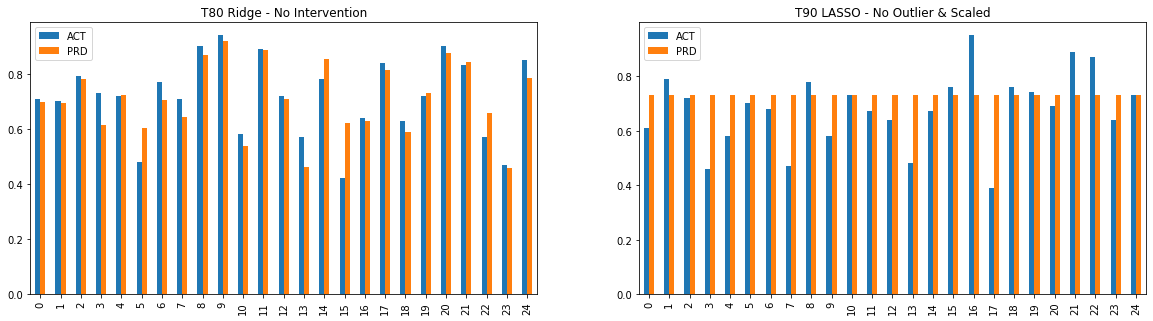

In [66]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (20,5))

pd.DataFrame({'ACT' : y_test.flatten(),'PRD' : yp_RID.flatten()}).head(25).plot(kind = 'bar', ax=ax1).set_title('T80 Ridge - No Intervention')

pd.DataFrame({'ACT' : y5_test.flatten(),'PRD' : yp_LAS5.flatten()}).head(25).plot(kind = 'bar', ax=ax2).set_title('T90 LASSO - No Outlier & Scaled')

From above plots we can see that although the best model (left plot) prediction kind of following the actual pattern, it's still not completely follows the actual pattern, as we can see that there are some of the predictions going beyond the actual pattern, and vice-versa. But when we compare that to the worst model (right plot), we can see the differences between the pattern, since the worst model prediction didn't really follows the actual patterns.